# Seaborn

## Intro

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. The training below is adopted from the [Seaborn online reference](https://stanford.edu/~mwaskom/software/seaborn/).

## Learning Outcomes


At the end of the workshop, students would have gained an appreciate and hand-ons practical experience on the following topics:
* Visualising the distribution
  * Plotting univariate distribution
  * Plotting bivariate distributions
  * scatter plots
  * Hexbins plots
  * Kernel density estimation
  * joint plot
* Visualising pairwise relationships
* Visualising linear relationship
* Functions to draw linear Regression 
* Plotting a regression in other contexts
* Annotated heatmaps
* Boxplots
* Correlation matrix heatmap

In [1]:
import seaborn as sns

In [2]:
sns.__version__

'0.9.0'

# Visualizing the distribution of a dataset

In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns
sns.set(color_codes=True)

In [6]:
np.random.seed(sum(map(ord, "distributions")))

## Plotting univariate distributions

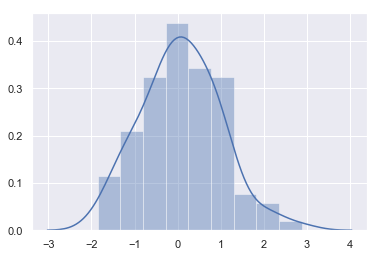

In [7]:
x = np.random.normal(size=100)
sns.distplot(x);

## Histograms

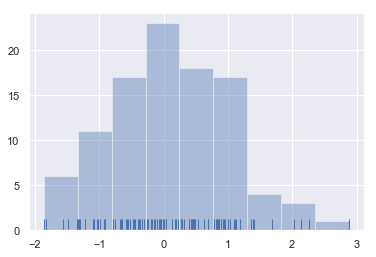

In [8]:
sns.distplot(x, kde=False, rug=True);

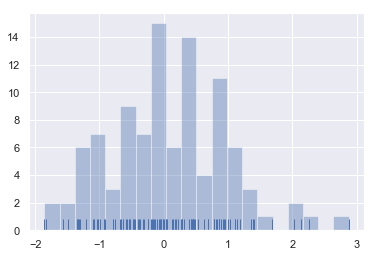

In [9]:
sns.distplot(x, bins=20, kde=False, rug=True);

## Plotting bivariate distributions

In [10]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

In [11]:
df.head()

,x,y
0,-0.995328,0.721782
1,-0.944528,0.276843
2,-1.109385,2.246853
3,0.682844,0.023013
4,-0.417883,-0.987145


## Scatterplots

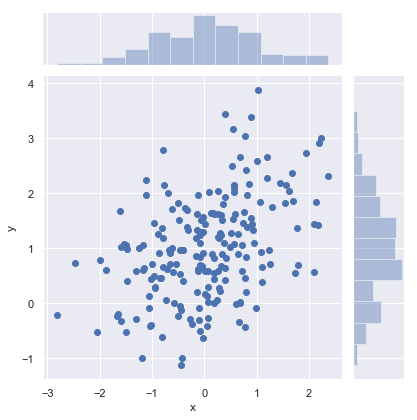

In [12]:
sns.jointplot(x="x", y="y", data=df);

## Hexbins plots

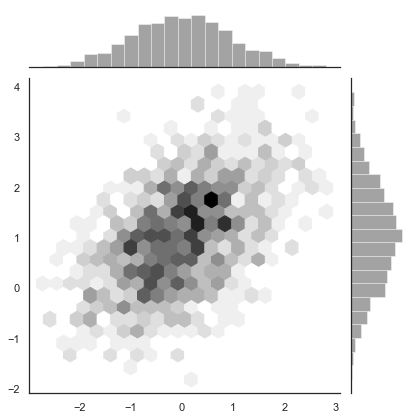

In [13]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

## Kernel density estimation

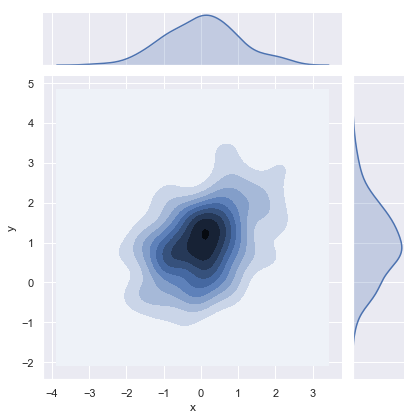

In [14]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

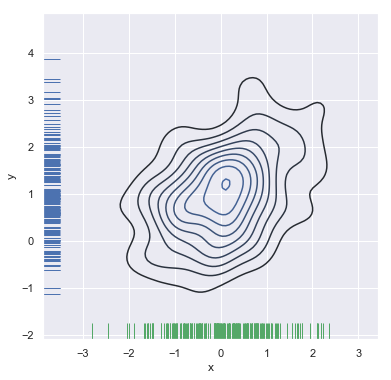

In [15]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

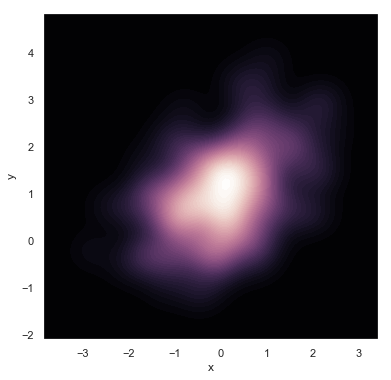

In [16]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

## Joint plot

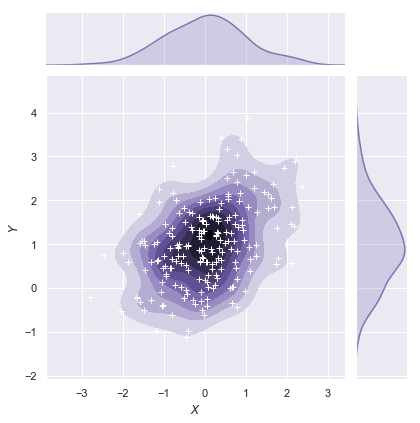

In [17]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

# Visualizing pairwise relationships in a dataset

In [18]:
iris = sns.load_dataset("iris")

In [19]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


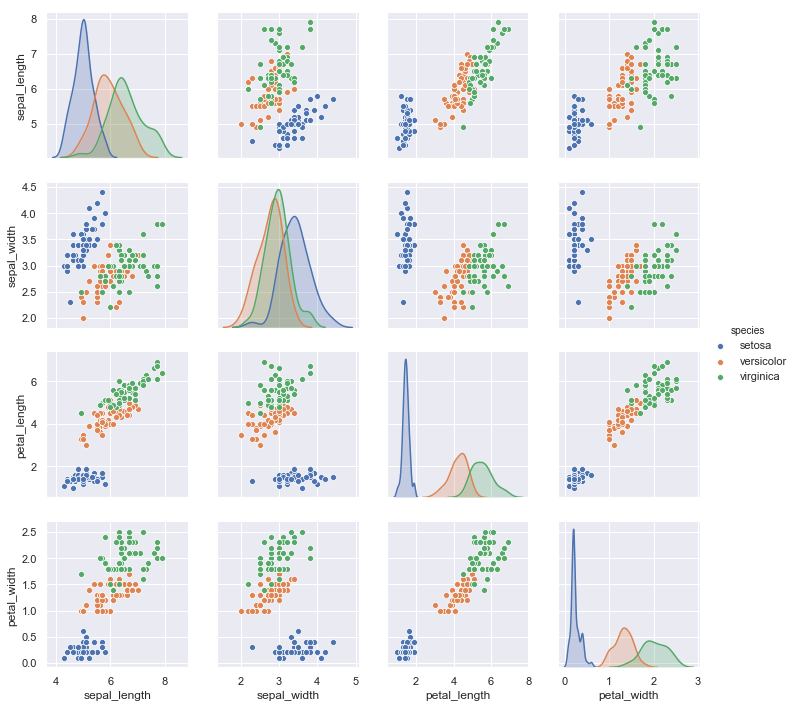

In [20]:
iris = sns.load_dataset("iris")
sns.pairplot(iris, hue='species');

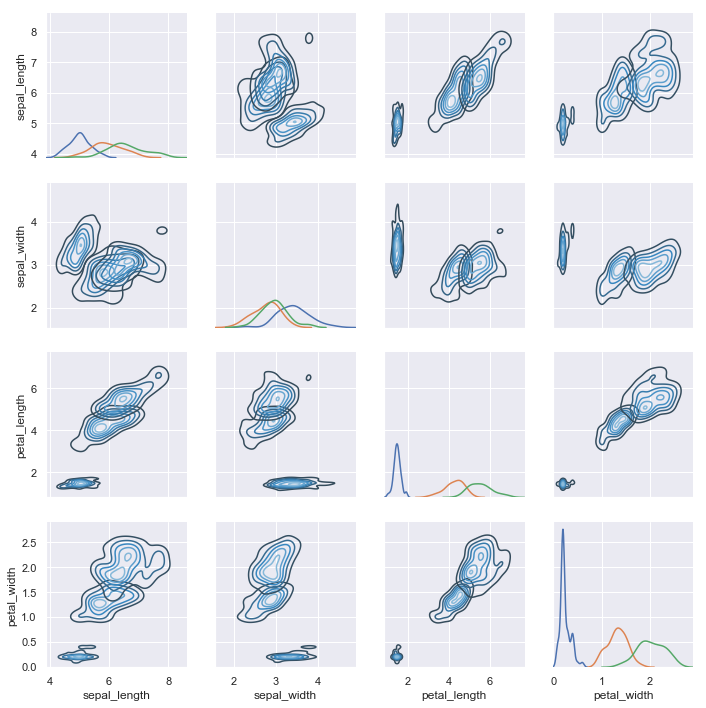

In [21]:
g = sns.PairGrid(iris, hue='species')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

# Visualizing linear relationships

In [22]:
%matplotlib inline

In [23]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [24]:
import seaborn as sns
sns.set(color_codes=True)

In [25]:
np.random.seed(sum(map(ord, "regression")))

In [26]:
tips = sns.load_dataset("tips")

# Functions to draw linear regression models

Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, regplot() and lmplot() are closely related, and share much of their core functionality. It is important to understand the ways they differ, however, so that you can quickly choose the correct tool for particular job.

In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression:

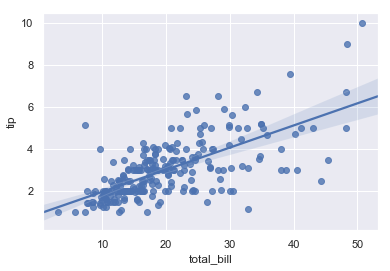

In [27]:
sns.regplot(x="total_bill", y="tip", data=tips);

In [28]:
sns.lmplot?

Signature:
sns.lmplot(
    x,
    y,
    data,
    hue=None,
    col=None,
    row=None,
    palette=None,
    col_wrap=None,
    height=5,
    aspect=1,
    markers='o',
    sharex=True,
    sharey=True,
    hue_order=None,
    col_order=None,
    row_order=None,
    legend=True,
    legend_out=True,
    x_estimator=None,
    x_bins=None,
    x_ci='ci',
    scatter=True,
    fit_reg=True,
    ci=95,
    n_boot=1000,
    units=None,
    order=1,
    logistic=False,
    lowess=False,
    robust=False,
    logx=False,
    x_partial=None,
    y_partial=None,
    truncate=False,
    x_jitter=None,
    y_jitter=None,
    scatter_kws=None,
    line_kws=None,
    size=None,
)
Docstring:
Plot data and regression model fits across a FacetGrid.

This function combines :func:`regplot` and :class:`FacetGrid`. It is
intended as a convenient interface to fit regression models across
conditional subsets of a dataset.

When thinking about how to assign variables to different facets, a general
rule is 

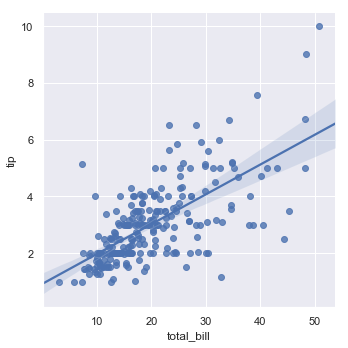

In [29]:
sns.lmplot(x="total_bill", y="tip", data=tips);

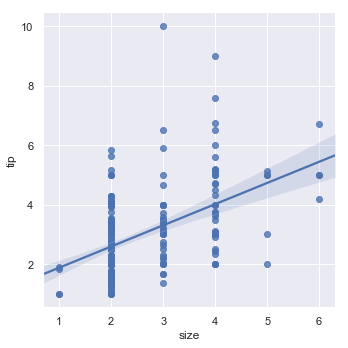

In [30]:
sns.lmplot(x="size", y="tip", data=tips);

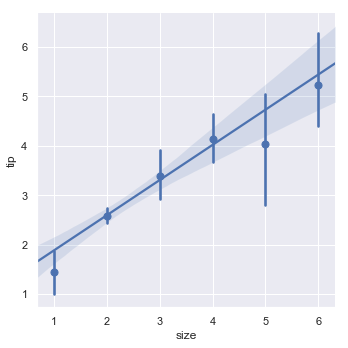

In [31]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

# Plotting a regression in other contexts

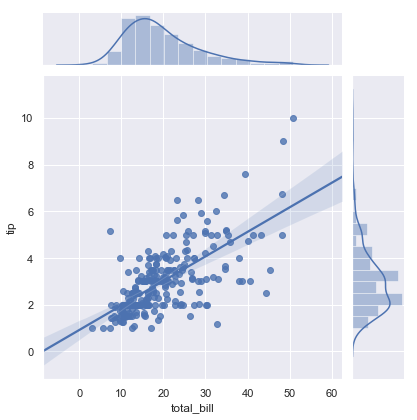

In [32]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

# Annotated heatmaps

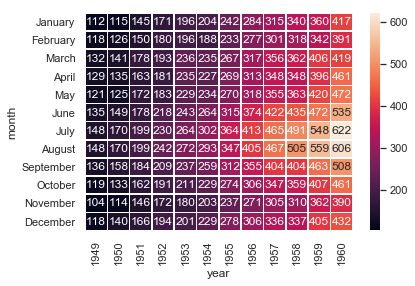

In [33]:
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5);

# Boxplots

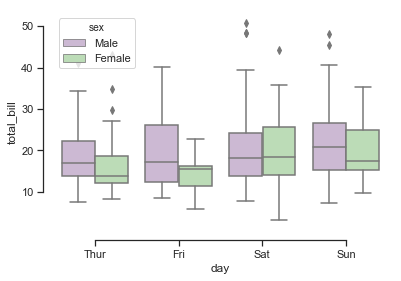

In [34]:
import seaborn as sns
sns.set(style="ticks")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")
sns.despine(offset=10, trim=True)

# Correlation matrix heatmap

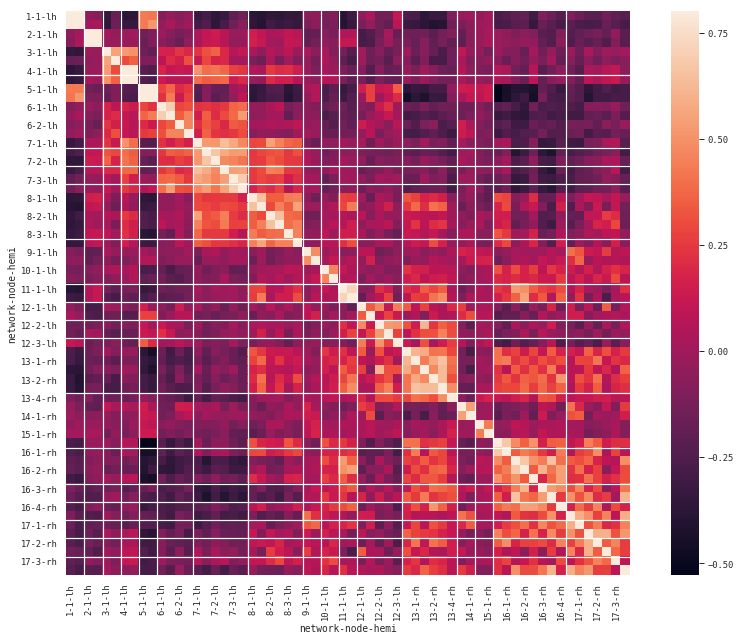

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
corrmat = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)

# Use matplotlib directly to emphasize known networks
networks = corrmat.columns.get_level_values("network")
for i, network in enumerate(networks):
    if i and network != networks[i - 1]:
        ax.axhline(len(networks) - i, c="w")
        ax.axvline(i, c="w")
f.tight_layout()

***